    Overview
This notebook uses H2O AutoML for automated machine learning to predict personality types (Introvert/Extrovert) from the Tabular Playground Series dataset. The solution includes data exploration, preprocessing, model training, and submission generation.

In [21]:
pip install h2o

Data Loading & Inspection

In [22]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

print(f"Train shape: {train.shape}, Test shape: {test.shape}")
train.head()

Train shape: (18524, 9), Test shape: (6175, 8)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


Missing Values Heatmap

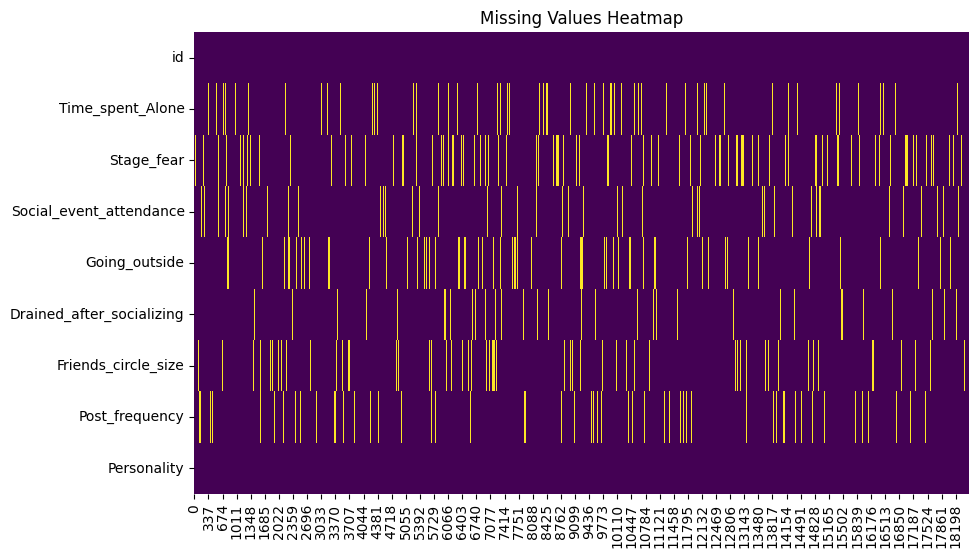

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull().T, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Data Preprocessing

In [24]:
# Drop ID column
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

# Separate features and target
X = train.drop(columns=['Personality'])
y = train['Personality']

print("Feature-Target Split Complete")

Feature-Target Split Complete


Target Distribution

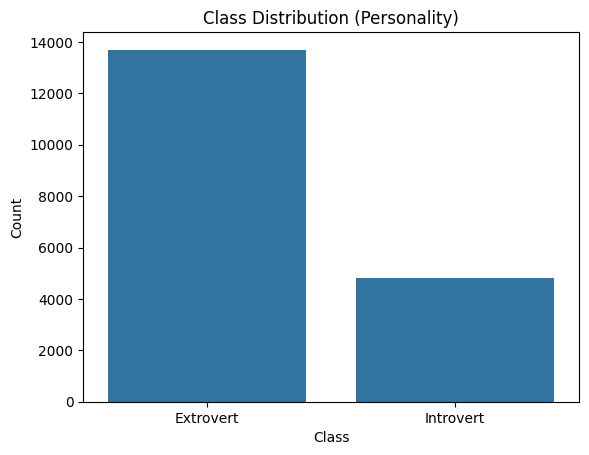

In [25]:
sns.countplot(x=y)
plt.title('Class Distribution (Personality)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

AutoML Training

In [26]:
# Initialize H2O
h2o.init()

# Convert to H2O Frames
train_data = h2o.H2OFrame(train)
test_data = h2o.H2OFrame(test)

# Configure AutoML
aml = H2OAutoML(
    max_runtime_secs=120,
    seed=5,
    project_name="personality_prediction"
)

# Train models
aml.train(y='Personality', training_frame=train_data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,5 mins 54 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_9y4j74
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.152 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
07:16:09.445: New models will be added to existing leaderboard personality_prediction@@Personality (leaderboard frame=null) with already 13 models.
07:16:58.434: StackedEnsemble_BestOfFamily_3_AutoML_2_20250713_71609 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
07:17:59.882: New models will be added to existing leaderboard personality_prediction@@Personality (leaderboard frame=null) with already 20 models.

█████████████████████
07:18:40.258: StackedEnsemble_BestOfFamily_4_AutoML_3_20250713_71759 [StackedEnsemble 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20250713_71211


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    37                 37                          38797                  8            8            8             53            129           79.4054

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.026413555270088773
RMSE: 0.16252247619972068
LogLoss: 0.11469476050590875
Mean Per-Class Error: 0.038877426475288274
AUC: 0.9857578197720267
AUCPR: 0.9717620702431492
Gini: 0.9715156395440534

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36929253095816683
           Extrovert    Introvert    Error    Rate
---------  -----------  -----------  -------  ---------------
Extrovert  13443        256          0.0187   (256.0/13699.0)
Introvert  285          4540         0.0591   (285.0/4825.0)
Total      13728        4796         0.0292   (541.0/18524.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.369293     0.943769  209
max f2                       0.081403     0.945401  267
max f0point5                 0.79678      0.949042  144
max accuracy                 0.375556     0.970795  208
max precision                0.967942     1         0
max recall                   0.0151889    1         388
max specificity              0.967942     1         0
max absolute_mcc             0.369293     0.924052  209
max min_per_class_accuracy   0.0657243    0.95772   278
max mean_per_class_accuracy  0.150416     0.961894  241
max tns                      0.967942     13699     0
max fns                      0.967942     4816      0
max fps                      0.0094649    13699     399
max tps                      0.0151889    4825      388
max tnr                      0.967942     1         0
max fnr                      0.967942     0.998135  0
max fpr                      0.0094649    1         399
max tpr                      0.0151889    1         388

Gains/Lift Table: Avg response rate: 26.05 %, avg score: 26.08 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010041                    0.96175            3.83917    3.83917            1                0.963931   1                           0.963931            0.0385492       0.0385492                  283.917   283.917            0.0385492
2        0.0200281                   0.958902           3.83917    3.83917            1                0.960271   1                           0.962106            0.038342        0.0768912                  283.917   283.917            0.0768912
3        0.0300151                   0.95674            3.83917    3.83917            1                0.957772   1                           0.960664            0.038342        0.115233                   283.917   283.917            0.115233
4        0.0400022                   0.954946           3.77691    3.82363            0.983784         0.955846   0.995951                    0.959461            0.0377202       0.152953                   277.691   282.363            0.152734
5        0.0500432                   0.95332

Leaderboard Visualization

In [27]:
# Display top models
lb = aml.leaderboard
lb.head(10)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20250713_71211,0.969622,0.13059,0.935809,0.0419921,0.171067,0.0292639
GBM_14_AutoML_3_20250713_71759,0.969572,0.132345,0.934315,0.0433888,0.172171,0.029643
XGBoost_8_AutoML_3_20250713_71759,0.969226,0.130959,0.935411,0.0413456,0.171001,0.0292415
StackedEnsemble_AllModels_1_AutoML_1_20250713_71211,0.969224,0.129498,0.936102,0.0416754,0.170318,0.0290084
GBM_1_AutoML_1_20250713_71211,0.969198,0.129789,0.938553,0.0417849,0.170355,0.0290207
GBM_6_AutoML_2_20250713_71609,0.969198,0.129789,0.938553,0.0417849,0.170355,0.0290207
GBM_10_AutoML_3_20250713_71759,0.969198,0.129789,0.938553,0.0417849,0.170355,0.0290207
GBM_7_AutoML_2_20250713_71609,0.969137,0.12998,0.938182,0.0422489,0.170794,0.0291705
GBM_11_AutoML_3_20250713_71759,0.969137,0.12998,0.938182,0.0422489,0.170794,0.0291705
GBM_8_AutoML_2_20250713_71609,0.969002,0.130697,0.937285,0.0423089,0.171358,0.0293634


Model Evaluation

In [28]:
# Get best model
best_model = aml.leader

# Model performance metrics
perf = best_model.model_performance(train_data)
print(f"Model Accuracy: {perf.accuracy()[0][1]:.4f}")

Model Accuracy: 0.9708


Confusion Matrix

In [29]:
cm = perf.confusion_matrix()

# 2. Print the confusion matrix
# Printing the object gives a well-formatted table.
print("Confusion Matrix on Training Data:")
print(cm)

Confusion Matrix on Training Data:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36929251446045497
           Extrovert    Introvert    Error    Rate
---------  -----------  -----------  -------  ---------------
Extrovert  13443        256          0.0187   (256.0/13699.0)
Introvert  285          4540         0.0591   (285.0/4825.0)
Total      13728        4796         0.0292   (541.0/18524.0)


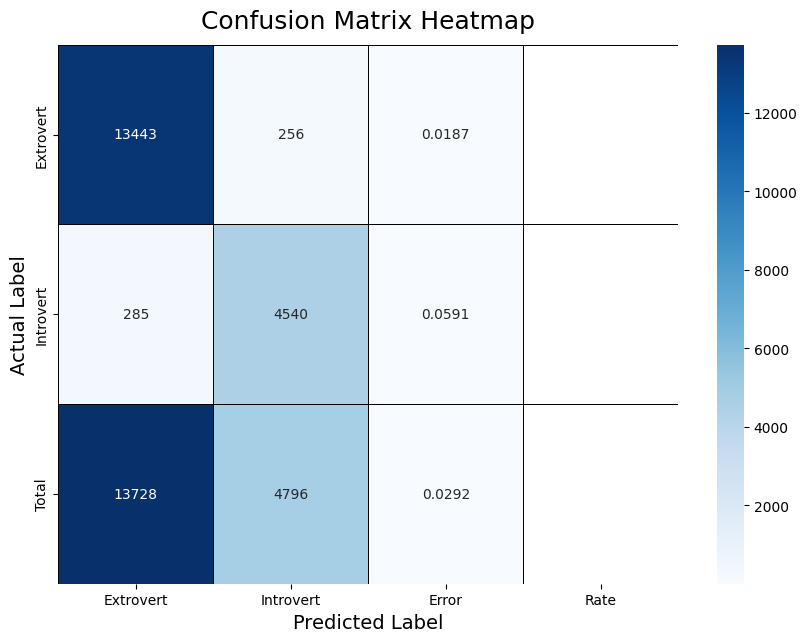

In [30]:
cm_df = cm.table.as_data_frame()
cm_df.set_index(cm_df.columns[0], inplace=True)

# Iterate through each column and convert to numeric, coercing errors to NaN
for col in cm_df.columns:
    cm_df[col] = pd.to_numeric(cm_df[col], errors='coerce')
# Fill any NaN values that resulted from coercion with -1 or an appropriate value
# cm_df.fillna(-1, inplace=True)

# Create the heatmap plot
plt.figure(figsize=(10, 7)) # Set the figure size for better readability
heatmap = sns.heatmap(
    cm_df,
    annot=True,      # Display the numbers in each cell
    fmt='g',         # Use general format for numbers (no scientific notation)
    cmap='Blues',    # Use a blue color map
    linewidths=.5,   # Add lines between cells
    linecolor='black' # Set line color to black
)

# Add titles and labels for clarity
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'size':18}, pad=12)
heatmap.set_xlabel('Predicted Label', fontsize=14)
heatmap.set_ylabel('Actual Label', fontsize=14)

# 4. Display the plot
plt.show()

Generate Predictions

In [31]:
# Make predictions
predictions = best_model.predict(test_data)
predictions_df = predictions.as_data_frame()

# Create submission
sub['Personality'] = predictions_df['predict'].values
sub.to_csv('submission.csv', index=False)
sub.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


Prediction Distribution

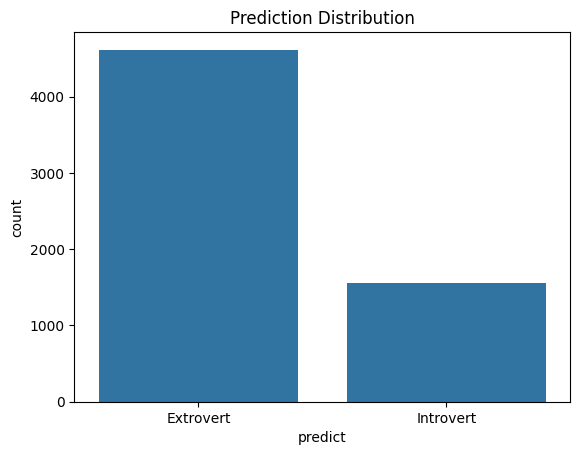

In [32]:
sns.countplot(x=predictions_df['predict'])
plt.title('Prediction Distribution')
plt.show()

Conclusion
This solution demonstrates:

Comprehensive EDA with visualizations

Efficient AutoML pipeline with H2O

Model evaluation and interpretation

Submission-ready output